### Material de Curso de Gestión
# Razonamientos sobre qué estrategia es la mejor usando data

#### José Carlos Machicao, GestioDinámica

- Una organización que tiene clientes. 
- Esta organización necesita crecer o mantenerse sostenible en el tiempo, para lo cual ya ha hecho una inversión importante que le ha dado 10 clientes importantes. 
- Los clientes tienen determinados parámetros: 
    - tamaño,
    - vínculos en redes, 
    - satisfacción y 
    - visión convergente. 
- La unidad mínima de éxito es el cliente sostenible satisfecho sosteniblemente

Los parámetros se definen como sigue:
- Tamaño: Qué tan grande es su adquisición de servicios o productos
- Vínculos: Qué tan vinculado está a una o varias redes de interesados en servicios o productos similares
- Satifacción: Qué tan satisfecho está con los servicios o productos
- Visión Convergente: Qué tan coincidente es su visión de largo plazo con la de nuestra organización


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
columnas = ['tamanho', 'vinculos', 'satisfaccion', 'vision_conv']
cliente_01 = [3, 2, 7, 2]
cliente_02 = [2, 4, 1, 5]
cliente_03 = [3, 3, 2, 3]
cliente_04 = [8, 7, 8, 6]
cliente_05 = [5, 1, 2, 2]
cliente_06 = [8, 3, 6, 9]
cliente_07 = [4, 7, 9, 5]
cliente_08 = [9, 5, 5, 2]
cliente_09 = [2, 9, 2, 9]
cliente_10 = [7, 6, 5, 4]

nombres = [cliente_01, cliente_02, cliente_03, cliente_04, cliente_05, cliente_06, cliente_07, cliente_08, cliente_09, cliente_10]
data_cli = pd.DataFrame(nombres)
data_cli.T
data_cli.columns = columnas
data_cli['nombres'] = ['cliente_01', 'cliente_02', 'cliente_03', 'cliente_04', 'cliente_05', 'cliente_06', 
                       'cliente_07', 'cliente_08', 'cliente_09', 'cliente_10']
data_cli['suma'] = data_cli.sum(axis=1)
data_cli['suma_plus'] = data_cli[['vinculos', 'vision_conv']].sum(axis=1)
data_cli['suma_less'] = data_cli[['tamanho', 'satisfaccion']].sum(axis=1)

#opciones (elija comentar una)
#data_cli = data_cli.sort_values(by=['suma_plus'], ascending=True, ignore_index=True)
data_cli = data_cli.sort_values(by=['suma_less'], ascending=True, ignore_index=True)

data_cli

,tamanho,vinculos,satisfaccion,vision_conv,nombres,suma,suma_plus,suma_less
0,2,4,1,5,cliente_02,12,9,3
1,2,9,2,9,cliente_09,22,18,4
2,3,3,2,3,cliente_03,11,6,5
3,5,1,2,2,cliente_05,10,3,7
4,3,2,7,2,cliente_01,14,4,10
5,7,6,5,4,cliente_10,22,10,12
6,4,7,9,5,cliente_07,25,12,13
7,8,3,6,9,cliente_06,26,12,14
8,9,5,5,2,cliente_08,21,7,14
9,8,7,8,6,cliente_04,29,13,16


In [29]:
data_cli.to_excel('D://2020_dat/dat_cursos/data_clientes.xlsx')

## Análisis tradicional
El enfoque tradicional de gestión prioriza el tamaño y la satisfacción.

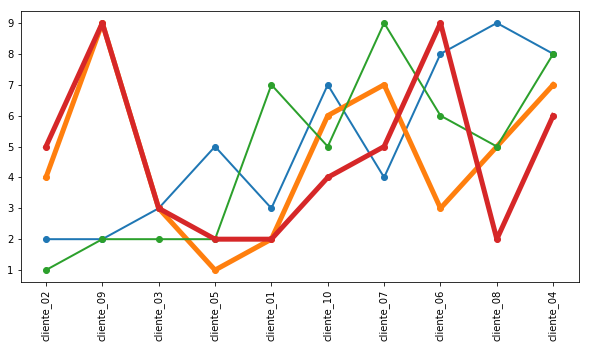

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data_cli.nombres, data_cli.tamanho, 'o-', lw=2)
plt.plot(data_cli.nombres, data_cli.vinculos, 'o-', lw=5)
plt.plot(data_cli.nombres, data_cli.satisfaccion, 'o-', lw=2)
plt.plot(data_cli.nombres, data_cli.vision_conv, 'o-', lw=5)
plt.xticks(rotation=90)
plt.show()

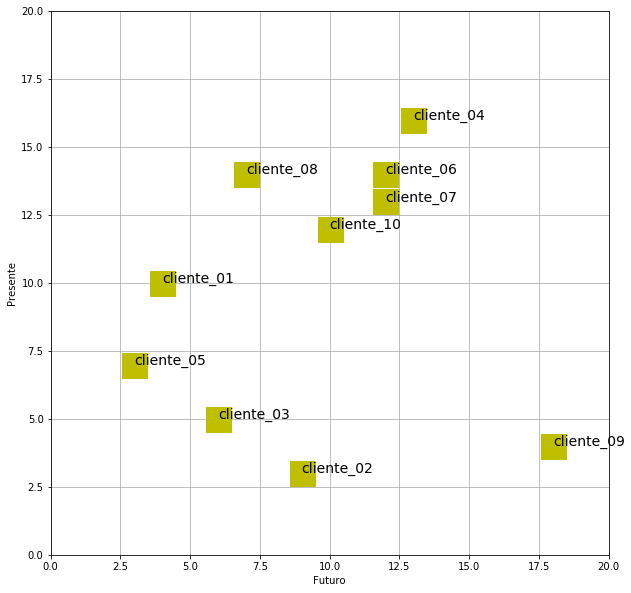

In [6]:
# Rankings
plt.figure(figsize=(10,10))
for it, row in data_cli.iterrows():
    plt.plot(row.suma_plus, row.suma_less, 'ys', ms=25)
    plt.text(row.suma_plus, row.suma_less, row.nombres, fontsize=14)
plt.xlabel('Futuro')
plt.ylabel('Presente')
plt.grid(True)
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

# Análisis con Machine Learning (No Supervisado)

In [98]:
import sklearn
from sklearn.cluster import KMeans

In [99]:
data_cli = pd.read_excel('D://2020_dat/dat_cursos/data_clientes.xlsx')
data_cli.tail()

,ventas,vinculos,satisfaccion,vision_conv,nombres,suma,suma_plus,suma_less,cluster
94,1,4,2,7,cliente_95,14,11,3,0
95,5,8,1,7,cliente_96,21,15,6,0
96,5,3,3,4,cliente_97,15,7,8,0
97,6,5,4,8,cliente_98,23,13,10,0
98,4,1,5,1,cliente_99,11,2,9,0


In [111]:
data_cli.index = data_cli.nombres
X = data_cli.iloc[:,0:4]
#X

In [113]:
km = KMeans(n_clusters=4, random_state=10).fit(X)
data_cli['cluster'] = clus
#data_cli

In [112]:
clus = list(km.labels_)
len(clus)

99

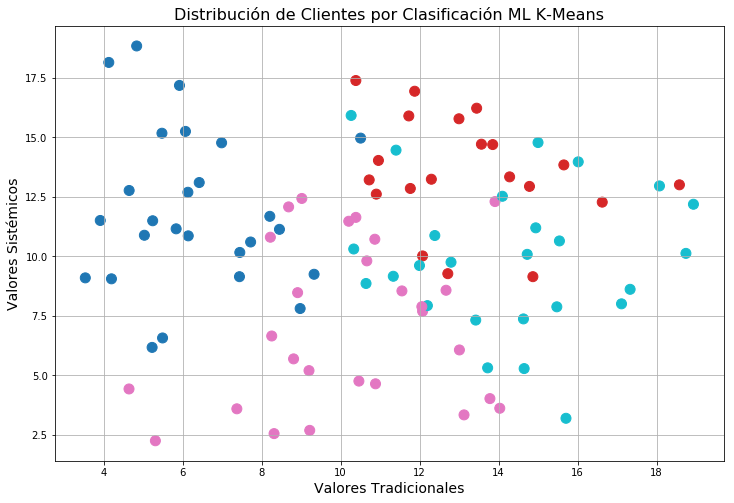

In [120]:
plt.figure(figsize=(12,8))
#colores = data_cli.cluster.unique()
plt.scatter(data_cli.suma_less+np.random.rand(len(data_cli)), 
            data_cli.suma_plus+np.random.rand(len(data_cli)), 
            s=100, cmap='tab10', c=data_cli.cluster) 
plt.xlabel('Valores Tradicionales', fontsize=14)
plt.ylabel('Valores Sistémicos', fontsize=14)
plt.title('Distribución de Clientes por Clasificación ML K-Means', fontsize=16)
plt.grid()
plt.show()